# Analysis of N2 and H2 sweeps over different ansätze

In [35]:
import tikzplotlib
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

plt.rcParams.update({"lines.markersize":3, "xtick.major.size":3, "xtick.minor.size":3, "ytick.major.size":3, "ytick.minor.size":3, "xtick.direction":"in", "ytick.direction":"in"}) 
plt.rcParams["axes.prop_cycle"] = cycler(color=["#ff0000", "#ff7700", "#00b300", "#9000ff", "#ff00b3", "#00bb6d", "#0000c3c4"])


R_eq [Å]   = 0.75
D_e [Ha]   = 0.164042942056
D_e [eV]   = 4.463835857214045
D_e [kcal/mol] = 102.93850028297304


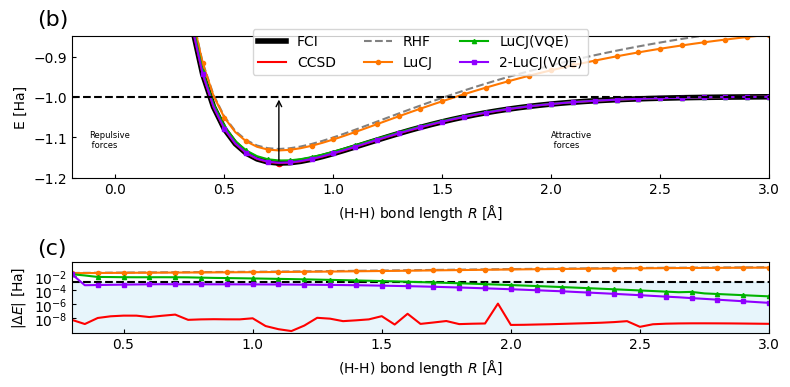

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("../data/classical/h2_cc-pVDZ.csv")
R = d["R"].to_numpy()
E_FCI = d["E_FCI"].to_numpy()

series = {
    "CCSD": d["E_CCSD"].to_numpy(),
    "RHF": d["E_HF"].to_numpy(),
    "LuCJ": d["E_LuCJ"].to_numpy(),
    "LuCJ(VQE)": d["E_LuCJ1(opt)"].to_numpy(),
    "2-LuCJ(VQE)": d["E_LuCJ2(opt)"].to_numpy(),
}

# Absolute errors vs FCI
err = {k: np.abs(v - E_FCI) for k, v in series.items()}

styles = { "CCSD": {"ls": "-", "marker": ""}, 
          "RHF": {"ls": "--", "marker": "", "color": 'gray'}, 
          "LuCJ": {"ls": "-", "marker": "o", "lw":1.5}, 
          "LuCJ(VQE)": {"ls": "-", "marker": "^", "lw":1.5}, 
          "2-LuCJ(VQE)": {"ls": "-", "marker": "s", "lw":1.5}, }



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4),gridspec_kw={"height_ratios": [2, 1]})
lucj_labels = ["LuCJ", "LuCJ(VQE)", "2-LuCJ(VQE)"]

ax1.plot(R, E_FCI, label="FCI", c="k", lw=4)
for lab, E in series.items():
    style = styles.get(lab, {}).copy()
    if lab in lucj_labels:
        style["markevery"] = 2
    ax1.plot(R, E, label=lab, **style, markersize=3)

ax1.set_ylabel("E [Ha]")
ax1.set_xlabel(r"(H-H) bond length $R$ [Å]")
ax1.legend(ncol=3, loc="upper center", bbox_to_anchor=(0.5, 1.1))
ax2.set_xlim(R[0], R[-1])
ax2.fill_between(np.arange(0,4), 1e-11, 1.594e-3, color='skyblue', alpha=0.2)
ax2.axhline(1.594e-3, c='k', linestyle='--')
ax2.set_ylim(1e-10,1e-0)
ax1.set_xlim(R[0]-0.5, R[-1])
ax1.set_ylim(-1.2, -0.85)
ax1.annotate("Repulsive\n forces", xy=(-0.12, -1.125), fontsize=6)
ax1.annotate("Attractive\n forces", xy=(2, -1.125), fontsize=6)
ax1.scatter(0.75, -1.163593560652, c='r', s=20)

for lab, e in err.items():
    style = styles.get(lab, {}).copy()
    if lab in lucj_labels:
        style["markevery"] = 2
    ax2.semilogy(R, np.maximum(e, 1e-16), label=lab, **style)

E_asym = E_FCI[-1]
i_min = np.argmin(E_FCI)
R_eq = R[i_min]
E_min = E_FCI[i_min]

x0, x1 = ax1.get_xlim()
y0, y1 = ax1.get_ylim()

xmin_frac = (R_eq - x0) / (x1 - x0)
ymin_frac = (E_min - y0) / (y1 - y0)
ymax_frac = (E_asym - y0) / (y1 - y0)

ax1.axhline(E_asym, ls="--", c="k")
ax1.annotate(
    "",
    xy=(R_eq, E_asym),      # arrow head (on the hline)
    xytext=(R_eq, E_min),   # tail (at the minimum)
    arrowprops=dict(arrowstyle="->", linewidth=1)
)

E_asym = E_FCI[-1]
i_min = np.argmin(E_FCI)
R_eq = R[i_min]
E_min = E_FCI[i_min]
D_e = E_asym - E_min

hartree_to_eV = 27.211386245988
hartree_to_kcal = 627.509474

print("R_eq [Å]   =", R_eq)
print("D_e [Ha]   =", D_e)
print("D_e [eV]   =", D_e * hartree_to_eV)
print("D_e [kcal/mol] =", D_e * hartree_to_kcal)

ax1.text(-0.05, 1.05, "(b)", transform=ax1.transAxes,
         ha="left", va="bottom", fontsize=16)
ax2.text(-0.05, 1.05, "(c)", transform=ax2.transAxes,
         ha="left", va="bottom", fontsize=16)

ax2.set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
ax2.set_ylabel(r"$|\Delta E |$ [Ha]")
ax2.set_xlabel(r"(H-H) bond length $R$ [Å]")
ax2.set_xlim(R[0], R[-1])

plt.tight_layout()
tikzplotlib.save( "figures/H2_cc-pvdz.tex", axis_width="\\linewidth", textsize=6, extra_axis_parameters=[ "mark options={scale=5, line width=5}, tick label style={font=\\scriptsize}", "label style={font=\\footnotesize}", "title style={font=\\footnotesize}", "legend style={font=\\scriptsize}", ], extra_groupstyle_parameters=[ "horizontal sep=1.75cm" ] )

# **NITROGEN**

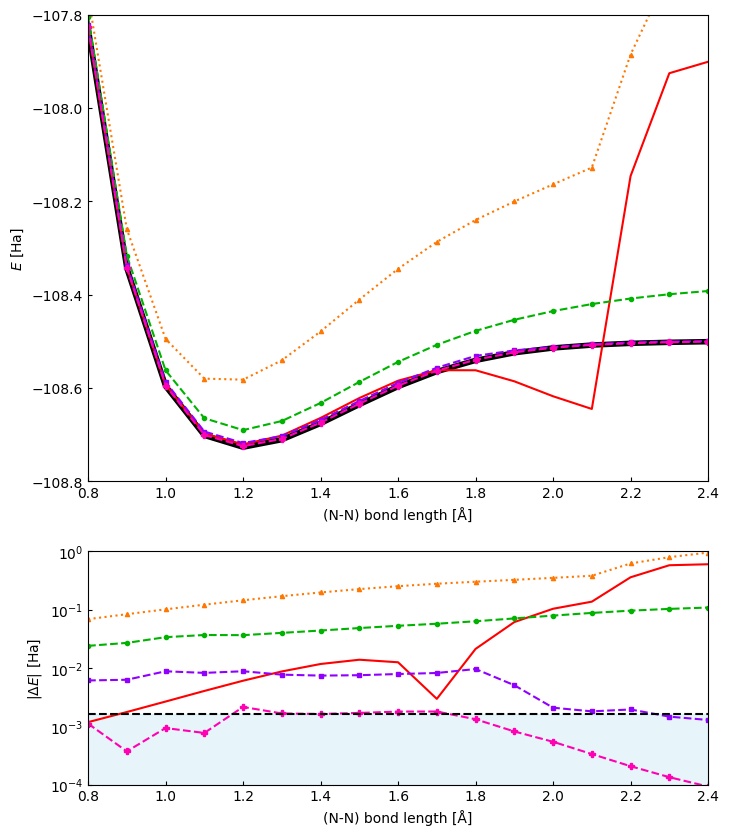

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("../data/classical/n2_sto-6g.csv")
R = d["R"].to_numpy()
E_FCI = d["E_FCI"].to_numpy()

series = {
    "CCSD": d["E_CCSD"].to_numpy(),
    "LuCJ": d["E_LuCJ"].to_numpy(),
    "1-LuCJ(VQE)": d["E_LuCJ1(opt)"].to_numpy(),
    "3-LuCJ(VQE)": d["E_LuCJ3(opt)"].to_numpy(),
    "7-LuCJ(VQE)": d["E_LuCJ7(opt)"].to_numpy()
}

# Absolute errors vs FCI
err = {k: np.abs(v - E_FCI) for k, v in series.items()}

styles = {
    "CCSD": {"ls": "-", "marker": "", "markersize": 5},
    "LuCJ": {"ls": ":", "marker": "^", "markersize": 3},
    "1-LuCJ(VQE)": {"ls": "--", "marker": "o", "markersize": 3},
    "3-LuCJ(VQE)": {"ls": "--", "marker": "s", "markersize": 3},
    "7-LuCJ(VQE)": {"ls": "--", "marker": "P", "markersize": 4}
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=False,
    gridspec_kw={"height_ratios": [2, 1]})

ax1.plot(R, E_FCI, label="FCI", c="k", lw=4)
for lab, E in series.items():
    ax1.plot(R, E, label=lab, **styles.get(lab, {}))
ax1.set_ylabel(r"$E$ [Ha]")
ax1.set_xlabel("(N-N) bond length [Å]")
ax1.set_xlim(R[0], R[-1])
ax1.set_ylim(-108.8,-107.8)

for lab, e in err.items():
    ax2.semilogy(R, np.maximum(e, 1e-16), label=lab, **styles.get(lab, {}))

ax2.set_ylabel(r"$|\Delta E|$ [Ha]")
ax2.set_xlabel("(N-N) bond length [Å]")
ax2.set_xlim(R[0], R[-1])
ax2.axhline(1.594e-3, linestyle='--',c='k')
ax2.set_ylim(1e-4,1e-0)
ax2.fill_between(np.arange(0,4), 1e-4, 1.594e-3, color='skyblue', alpha=0.2)
ax2.minorticks_off()

tikzplotlib.save( "figures/N2_sto-6g.tex", axis_width="\\linewidth", textsize=6, extra_axis_parameters=[ "tick label style={font=\\scriptsize}", "label style={font=\\footnotesize}", "title style={font=\\footnotesize}", "legend style={font=\\scriptsize}", ], extra_groupstyle_parameters=[ "vertical sep=1.0cm" ] )

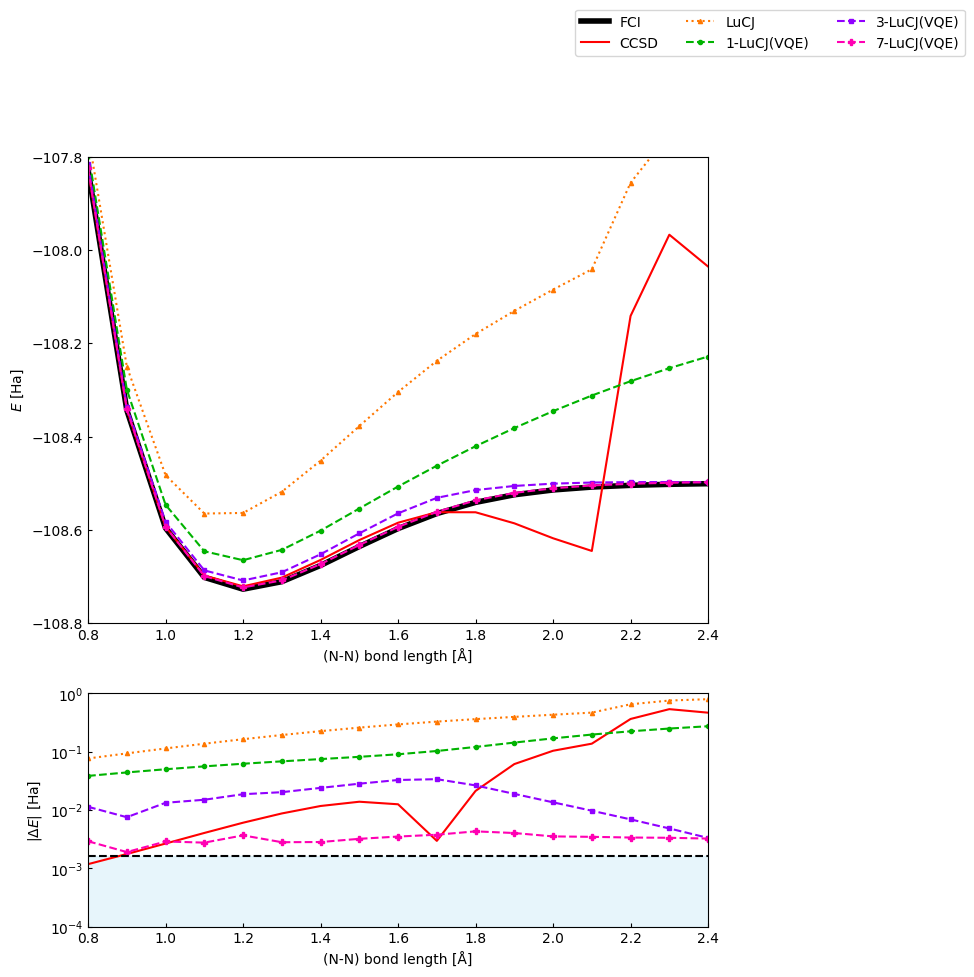

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("../data/classical/n2_sto-6g_hex.csv")
R = d["R"].to_numpy()
E_FCI = d["E_FCI"].to_numpy()

series = {
    "CCSD": d["E_CCSD"].to_numpy(),
    "LuCJ": d["E_LuCJ"].to_numpy(),
    "1-LuCJ(VQE)": d["E_LuCJ1(opt)"].to_numpy(),
    "3-LuCJ(VQE)": d["E_LuCJ3(opt)"].to_numpy(),
    "7-LuCJ(VQE)": d["E_LuCJ7(opt)"].to_numpy()
}

# Absolute errors vs FCI
err = {k: np.abs(v - E_FCI) for k, v in series.items()}

styles = {
    "CCSD": {"ls": "-", "marker": "", "markersize": 5},
    "LuCJ": {"ls": ":", "marker": "^", "markersize": 3},
    "1-LuCJ(VQE)": {"ls": "--", "marker": "o", "markersize": 3},
    "3-LuCJ(VQE)": {"ls": "--", "marker": "s", "markersize": 3},
    "7-LuCJ(VQE)": {"ls": "--", "marker": "P", "markersize": 4}
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=False,
    gridspec_kw={"height_ratios": [2, 1]})

ax1.plot(R, E_FCI, label="FCI", c="k", lw=4)
for lab, E in series.items():
    ax1.plot(R, E, label=lab, **styles.get(lab, {}))
ax1.set_ylabel(r"$E$ [Ha]")
ax1.set_xlabel("(N-N) bond length [Å]")
ax1.set_xlim(R[0], R[-1])
ax1.set_ylim(-108.8,-107.8)

for lab, e in err.items():
    ax2.semilogy(R, np.maximum(e, 1e-16), label=lab, **styles.get(lab, {}))
ax1.legend(ncol=3, loc="upper center", bbox_to_anchor=(1.1, 1.33))

ax2.set_ylabel(r"$|\Delta E|$ [Ha]")
ax2.set_xlabel("(N-N) bond length [Å]")
ax2.set_xlim(R[0], R[-1])
ax2.axhline(1.594e-3, linestyle='--',c='k')
ax2.set_ylim(1e-4,1e-0)
ax2.fill_between(np.arange(0,4), 1e-4, 1.594e-3, color='skyblue', alpha=0.2)
ax2.minorticks_off()

tikzplotlib.save( "figures/N2_sto-6g-hex.tex", axis_width="\\linewidth", textsize=6, extra_axis_parameters=[ "tick label style={font=\\scriptsize}", "label style={font=\\footnotesize}", "title style={font=\\footnotesize}", "legend style={font=\\scriptsize}", ], extra_groupstyle_parameters=[ "vertical sep=1.0cm" ] )

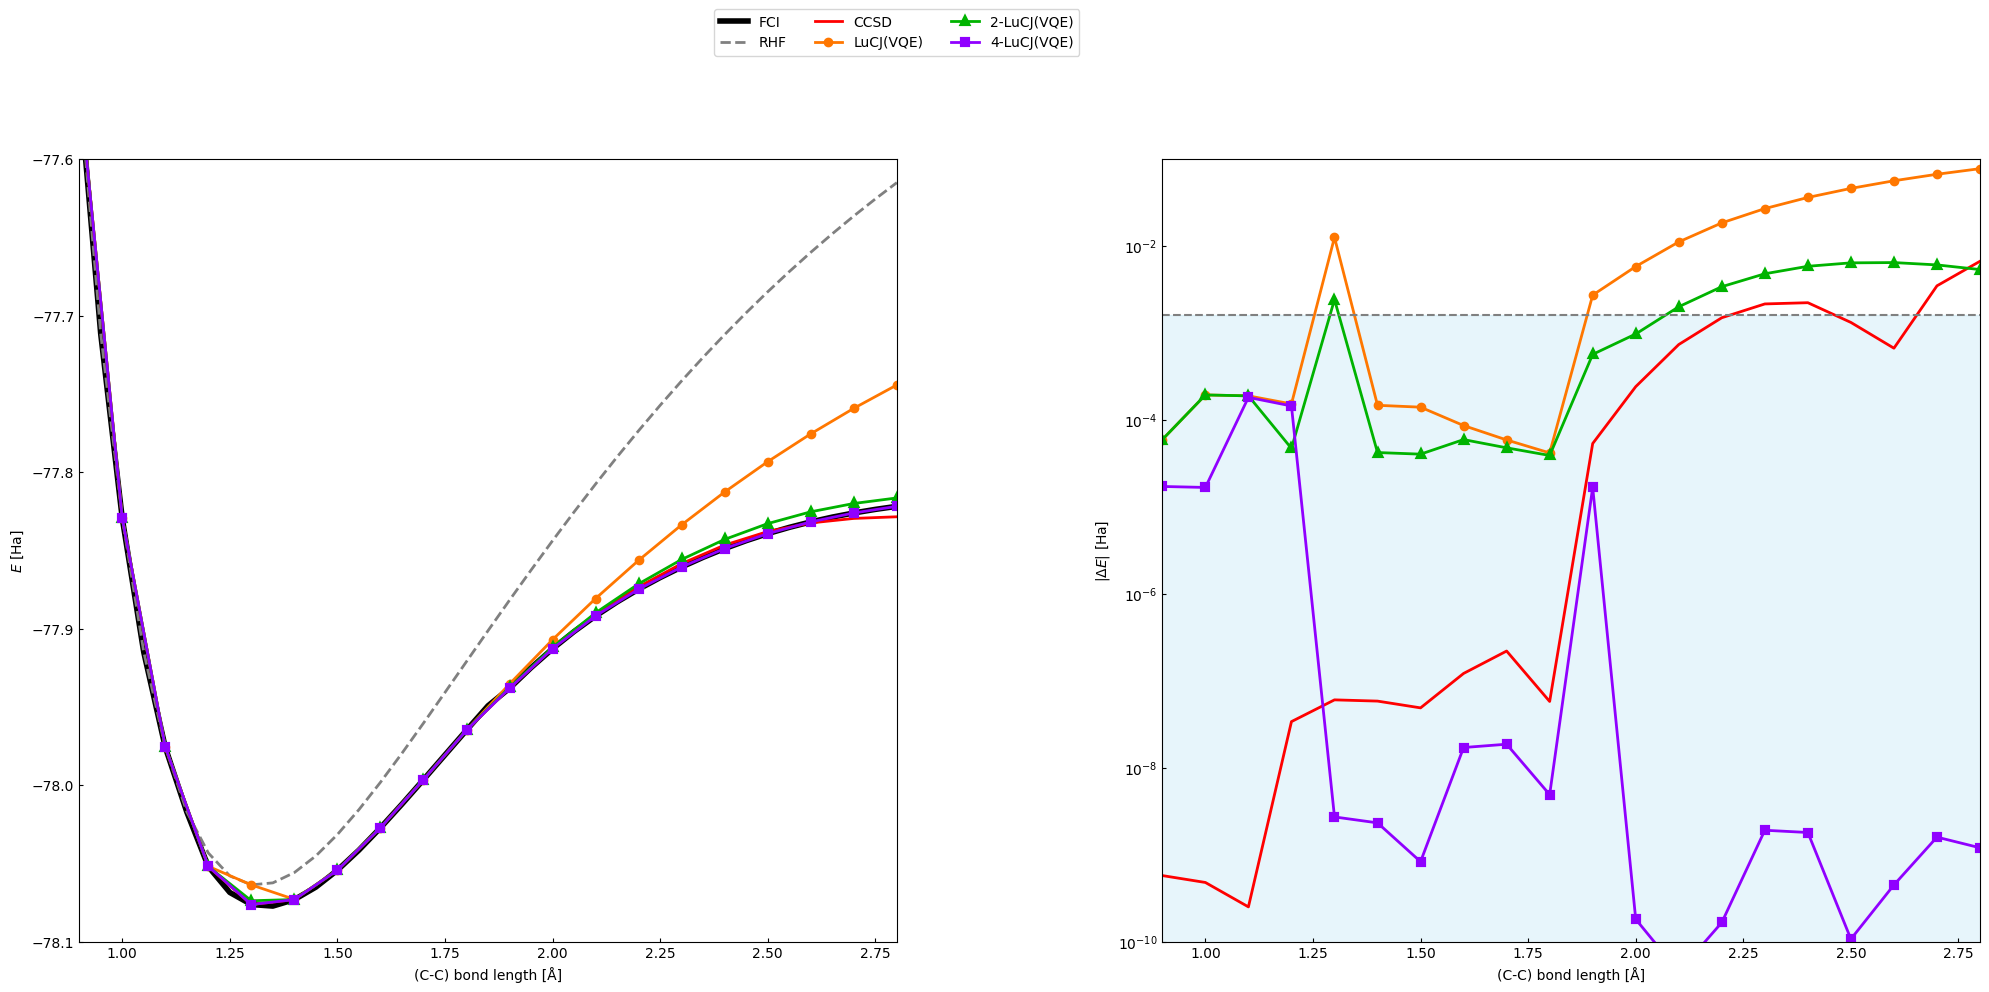

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("../data/classical/c2h4_cc-pvtz.csv")
R = d["R"].to_numpy()
E_FCI = d["E_FCI"].to_numpy()
E_HF = d["E_HF"].to_numpy()

series = {
    "CCSD": d["E_CCSD"].to_numpy(),
    "LuCJ(VQE)": d["E_LuCJ1(VQE)"].to_numpy(),
    "2-LuCJ(VQE)": d["E_LuCJ2(VQE)"].to_numpy(),
    "4-LuCJ(VQE)": d["E_LuCJ4(VQE)"].to_numpy()
}

# Absolute errors vs FCI
err = {k: np.abs(v - E_FCI) for k, v in series.items()}

styles = {
    "CCSD": {"ls": "-", "marker": ""},
    "LuCJ(VQE)": {"ls": "-", "marker": "o"},
    "2-LuCJ(VQE)": {"ls": "-", "marker": "^"},
    "4-LuCJ(VQE)": {"ls": "-", "marker":"s"},
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

ax1.plot(R, E_FCI, label="FCI", c="k", lw=4)
ax1.plot(R, E_HF, label="RHF", c="gray", ls="--", lw=2)
for lab, E in series.items():
    ax1.plot(R[::2], E[::2], label=lab, **styles.get(lab, {}), markersize=4, markeredgewidth=3, lw=2)

ax1.set_ylabel(r"$E$ [Ha]")
ax1.set_xlabel("(C-C) bond length [Å]")
ax1.legend(ncol=3, loc="upper center", bbox_to_anchor=(1,1.2))
ax1.set_xlim(R[0], R[-1])
ax1.set_ylim([-78.1, -77.6])

for lab, e in err.items():
    ax2.semilogy(R[::2], np.maximum(e, 1e-16)[::2], label=lab, **styles.get(lab, {}), markersize=4, markeredgewidth=3,lw=2)

ax2.axhline(1.594e-3, linestyle="--", c='gray')
ax2.set_ylabel(r"$|\Delta E |$ [Ha]")
ax2.set_xlabel("(C-C) bond length [Å]")
ax2.set_xlim(R[0], R[-1])
ax2.set_ylim(1e-10,1e-1)
ax2.fill_between(np.arange(0,4), 1e-12, 1.594e-3, color='skyblue', alpha=0.2)

plt.tight_layout()
tikzplotlib.save( "figures/c2h4_cc-pvtz.tex", axis_width="0.5\\linewidth", axis_height="0.5\\linewidth", textsize=6, extra_axis_parameters=[ "tick label style={font=\\scriptsize}", "mark options={scale=5, line width=5}",
"label style={font=\\footnotesize}", "title style={font=\\footnotesize}", "legend style={font=\\scriptsize}", ], extra_groupstyle_parameters=[ "horizontal sep=1.75cm" ] )
